# PYTHON-PANDAS: MOVIE FILMS DATA ANALYSIS USING SQLite DATABASE PLATFORM AND PANDAS

By: Hector Alvaro Rojas &nbsp;&nbsp;|&nbsp;&nbsp; Data Science, Visualizations and Applied Statistics &nbsp;&nbsp;|&nbsp;&nbsp; February 11, 2018<br>
    Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]
    <hr>

## I INTRODUCTION

Here is a way to process information about some movies of the 20th century that is available on [movielens](https://movielens.org/). The original database can be downloaded from [here](http://files.grouplens.org/datasets/movielens/ml-100k.zip). The database in SQLite format can be found [here](https://github.com/arqmain/Python/tree/master/Pandas/Project3) (movies.rar).

The main contribution of this project relates to the process of information in a backend mode. That is, the development of the project is achieved through successive queries to the main database (movies.db) and its initial component tables (users, ratings, and movies) that are located on the computer's hard drive.

All this project has been developed under Windows 7 in a 64 bits system. Anyway, all the scripts should be run on a 32 bits system too.

The connectivity treatment is given mainly through SQLITE and the Python PANDAS library. SQLITE is used to make the connection to the databases and PANDAS to make the queries that are included here. I choose SQLITE because of its great portability option.

It is very important to note that in this environment the commands are translated to SQL in the background and when forced to execute, then the compiled SQL is executed on the database side and only the resulting dataset is loaded to memory. This characteristic turns to be extremely handy when v.g. the whole dataset does not fit the computer memory.

It is left to the reader's discretion to consider developing this project occupying another database management platform like MS-SQL, MySQL, Maria, Oracle, Postgre, etc. It is also feasible to consider an online environment like "AWS-RDS Online Platform". This last environment makes the whole process even more efficient.

## Table of Contents
><b>I INTRODUCTION</b><br>
><b>II IMPORT REQUIRED PACKAGES</b><br>
><b>III LOADING DATA</b><br>
><b>IV GENERAL DATA CHECKING</b><br>
><b>V DATA ANALYSIS</b><br>
>* <b>What about the 10 most voted movies?</b><br>
>* <b>What about 10 most voted movies, among those voted at least 100 times?</b><br>
>* <b>What about 10 movies more highly rating?</b><br>
>* <b>What about 10 movies more highly rating, among those voted at least 100 times?</b><br>
>* <b>What about movies amongst occupations?</b><br>
	><i>Occupation of voters by size</i><br>
	><i>Occupation of voters by size, among those movies voted at least 100 times</i><br>
	><i>Movies rating mean by occupation of the voters</i><br>
	><i>Movies rating mean by occupation of the voters, among those movies voted at least 100 times</i><br>
	><i>Individual movie average rating by occupation of the voters</i><br>
	><i>Individual movie average rating by occupation of the voters, among those movies voted at least 100 times</i><br>    
>* <b>What about movies amongst ages groups?</b><br>
	><i>Ages groups of voters by size</i><br>
	><i>Ages groups of voters by size, among those movies voted at least 100 times</i><br>
	><i>Movie average rating by ages groups of the voters</i><br>
	><i>Movie average rating by ages groups of the voters, among those movies voted at least 100 times</i><br>
	><i>Individual movie average rating by age_group of the voters</i><br>
	><i>Individual movie average rating by age_group of the voters, among those movies voted at least 100 times</i><br>    
>* <b>What about movies amongst sex?</b><br>
	><i>Sex of voters by size</i><br>
	><i>Movie average rating by sex of the voters</i><br>
	><i>Movie average rating by sex of the voters, among those movies voted at least 100 times</i><br>
	><i>Individual movie average rating by sex of the voters</i><br>
	><i>Individual movie average rating by sex of the voters, among those movies voted at least 100 times</i><br>
>* <b>What about movies that men and women most like or dislike on rating?</b><br>
	><i>Numerical differences representation throughout all movies (df file)</i><br>
	><i>Graphical differences representation based on the most 20 voted movies (Best20 file)</i><br>
>    
><b>VI CONCLUSION</b><br>

## II IMPORT REQUIRED PACKAGES

In [1]:
from __future__ import print_function
%matplotlib inline

import os
import subprocess

import math
import numpy as np
from pandas.tools.plotting import scatter_matrix
from pandas.io import sql
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sqlite3
import pandas_profiling

C:\Users\Alvaro\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\Alvaro\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Alvaro\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Alvaro\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Alvaro\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\Alvaro\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  

## III LOADING DATA

In [2]:
# Connect to the database
conn = sqlite3.connect('C:/sqlite2/movies.db')


sql = "SELECT movies.movie_id, movies.title, movies.release_date, ratings.user_id, ratings.rating from movies inner join ratings on movies.movie_id = ratings.movie_id"
movie_ratings = pd.read_sql_query(sql, conn)

# Write the new DataFrame to a new "movie_ratings" table into "movies" SQLite database
movie_ratings.to_sql("movie_ratings", conn, if_exists="replace")

conn.close()
print (movie_ratings.shape)
movie_ratings.head()

(100000, 5)


,movie_id,title,release_date,user_id,rating
0,1,Toy Story (1995),01-Jan-1995,1,5
1,1,Toy Story (1995),01-Jan-1995,2,4
2,1,Toy Story (1995),01-Jan-1995,5,4
3,1,Toy Story (1995),01-Jan-1995,6,4
4,1,Toy Story (1995),01-Jan-1995,10,4


Using Pandas on a fly, we create a new categorical variable named "age_group" in "df" table to separate "age" in 9 sub-categories.  We then updated  "df" table and then we write it into "movies" SQLite database.

In [3]:
# Connect to the database
conn = sqlite3.connect('C:/sqlite2/movies.db')

sql = "SELECT movie_ratings.movie_id, movie_ratings.title, movie_ratings.release_date, movie_ratings.user_id, movie_ratings.rating, users.age, users.sex, users.occupation, users.zip_code from movie_ratings inner join users on movie_ratings.user_id = users.user_id"
df = pd.read_sql_query(sql, conn)

# Create new variable age_group into "df" table
age_group  = []

# For each row in the column,
for row in df['age']:
    # if more than a value,
    if row < 10:
        # Append a letter grade
        age_group.append('0-9')
    # else, if more than a value,
    elif row < 20:
        # Append a letter grade
        age_group.append('10-19')
    # else, if more than a value,
    elif row < 30:
        # Append a letter grade
        age_group.append('20-29')
    # else, if more than a value,
    elif row < 40:
        # Append a letter grade
        age_group.append('30-39')
    # else, if more than a value,
    elif row < 50:
        # Append a letter grade
        age_group.append('40-49')
    # else, if more than a value,
    elif row < 60:
        # Append a letter grade
        age_group.append('50-59')
    # else, if more than a value,
    elif row < 70:
        # Append a letter grade
        age_group.append('60-69')
    # else, if more than a value,
    elif row < 80:
        # Append a letter grade
        age_group.append('70-79')
    # otherwise,
    else:
        # Append a failing grade
        age_group.append('Failed')
        
# Create a column from the list
df['age_group'] = age_group

# Write the new DataFrame to a new "df" table into "movies" SQLite database
df.to_sql("df", conn, if_exists="replace")

conn.close()
print (df.shape)
df.head()

(100000, 10)


,movie_id,title,release_date,user_id,rating,age,sex,occupation,zip_code,age_group
0,1,Toy Story (1995),01-Jan-1995,1,5,24,M,technician,85711,20-29
1,1,Toy Story (1995),01-Jan-1995,2,4,53,F,other,94043,50-59
2,1,Toy Story (1995),01-Jan-1995,5,4,33,F,other,15213,30-39
3,1,Toy Story (1995),01-Jan-1995,6,4,42,M,executive,98101,40-49
4,1,Toy Story (1995),01-Jan-1995,10,4,53,M,lawyer,90703,50-59


## IV GENERAL DATA CHECKING

In [160]:
profile = pandas_profiling.ProfileReport(df)

In [161]:
profile

Number of variables,10
Number of observations,100000
Total Missing (%),0.0%
Total size in memory,7.6 MiB
Average record size in memory,80.0 B
Numeric,4
Categorical,6
Boolean,0
Date,0
Text (Unique),0
Rejected,0


The "df" dataset has no missing values.

The warning over the variables "release_date", "title", and Zip-code" is not important becouse those variables are special and they do not play a role as categorical ones. They are realy a kind a characters indicators.

The "age" distribution is negative asymmetric. The age average is 32.97 years with a minimum of 7 and maximum of 73. So, giving a fast look at the graphs we can blame for a young age dataset.

The rating histogram is coming up to shape a positive asymmetric distribution. The rating average is 3.53 points with a minimum of 1 and maximum of 5. So, the users tend to rate the movies high.

We can see that each class of "variable "sex" has a different number of instances, 25740 F (25.7%) and 74260 M (74.26%). So, this is a "sex" unbalance dataset.

Finally, a low negative Pearson and Spearman correlations measurements are telling us that younger guys tend to give a better rating to the movies than more older ones.

## V DATA ANALYSIS


### What about the 10 most voted movies?


In [130]:
conn = sqlite3.connect('C:/sqlite2/movies.db')

query = "SELECT movie_id, title, COUNT(rating) as NRated from df GROUP BY  title order BY NRated DESC Limit 10"

MostVoteddf = pd.read_sql_query(query, con=conn)
MostVoteddf['Percent'] = (MostVoteddf['NRated']/sum(MostVoteddf['NRated']))*100

conn.close()
print (MostVoteddf.shape)
MostVoteddf

(10, 4)


,movie_id,title,NRated,Percent
0,50,Star Wars (1977),583,11.988484
1,258,Contact (1997),509,10.466790
2,100,Fargo (1996),508,10.446227
3,181,Return of the Jedi (1983),507,10.425663
4,294,Liar Liar (1997),485,9.973268
5,286,"English Patient, The (1996)",481,9.891014
6,288,Scream (1996),478,9.829323
7,1,Toy Story (1995),452,9.294674
8,300,Air Force One (1997),431,8.862842
9,121,Independence Day (ID4) (1996),429,8.821715


In [131]:
# Clearing memory erasing data frame from memory
del (MostVoteddf)

### What about 10 most voted movies,  among those voted at least 100 times?

In [132]:
conn = sqlite3.connect('C:/sqlite2/movies.db')

query = "SELECT movie_id, title,  COUNT(rating) as NRated from df GROUP BY  title HAVING COUNT(rating) >= 100 order BY NRated DESC Limit 10"

MostVoted100 = pd.read_sql_query(query, con=conn)
MostVoted100['Percent'] = (MostVoted100['NRated']/sum(MostVoted100['NRated']))*100
conn.close()
print (MostVoted100.shape)
MostVoted100

(10, 4)


,movie_id,title,NRated,Percent
0,50,Star Wars (1977),583,11.988484
1,258,Contact (1997),509,10.466790
2,100,Fargo (1996),508,10.446227
3,181,Return of the Jedi (1983),507,10.425663
4,294,Liar Liar (1997),485,9.973268
5,286,"English Patient, The (1996)",481,9.891014
6,288,Scream (1996),478,9.829323
7,1,Toy Story (1995),452,9.294674
8,300,Air Force One (1997),431,8.862842
9,121,Independence Day (ID4) (1996),429,8.821715


In [133]:
# Clearing memory erasing data frame from memory
del (MostVoted100)

### What about 10 movies more highly rating?

In [134]:
# import math
# StdevFunc from: Standard Deviation for SQLite [https://stackoverflow.com/questions/2298339/standard-deviation-for-sqlite]

class StdevFunc:
    def __init__(self):
        self.M = 0.0
        self.S = 0.0
        self.k = 1

    def step(self, value):
        if value is None:
            return
        tM = self.M
        self.M += (value - tM) / self.k
        self.S += (value - tM) * (value - self.M)
        self.k += 1

    def finalize(self):
        if self.k < 3:
            return None
        return math.sqrt(self.S / (self.k-2))

conn = sqlite3.connect('C:/sqlite2/movies.db')

conn.create_aggregate("stdev", 1, StdevFunc)

query = "SELECT movie_id, title, COUNT(rating) as Size, AVG(rating) Mean, stdev(rating) as SDeviation  from df GROUP BY title order BY Mean DESC Limit 10"

BestMoviesdf = pd.read_sql_query(query, con=conn)
conn.close()
print (BestMoviesdf.shape)
BestMoviesdf

(10, 5)


,movie_id,title,Size,Mean,SDeviation
0,1536,Aiqing wansui (1994),1,5.0,NaN
1,1653,Entertaining Angels: The Dorothy Day Story (1996),1,5.0,NaN
2,814,"Great Day in Harlem, A (1994)",1,5.0,NaN
3,1201,Marlene Dietrich: Shadow and Light (1996),1,5.0,NaN
4,1189,Prefontaine (1997),3,5.0,0.0
5,1467,"Saint of Fort Washington, The (1993)",2,5.0,0.0
6,1500,Santa with Muscles (1996),2,5.0,0.0
7,1599,Someone Else's America (1995),1,5.0,NaN
8,1293,Star Kid (1997),3,5.0,0.0
9,1122,They Made Me a Criminal (1939),1,5.0,NaN


In [67]:
# Clearing memory erasing data frame from memory
del (BestMoviesdf)

### What about 10 movies more highly rating, among those voted at least 100 times?

In [135]:
# import math
# StdevFunc from: Standard Deviation for SQLite [https://stackoverflow.com/questions/2298339/standard-deviation-for-sqlite]

class StdevFunc:
    def __init__(self):
        self.M = 0.0
        self.S = 0.0
        self.k = 1

    def step(self, value):
        if value is None:
            return
        tM = self.M
        self.M += (value - tM) / self.k
        self.S += (value - tM) * (value - self.M)
        self.k += 1

    def finalize(self):
        if self.k < 3:
            return None
        return math.sqrt(self.S / (self.k-2))

conn = sqlite3.connect('C:/sqlite2/movies.db')

conn.create_aggregate("stdev", 1, StdevFunc)

query = "SELECT movie_id, title, COUNT(rating) as Size, AVG(rating) Mean, stdev(rating) as SDeviation  from df GROUP BY title HAVING COUNT(rating) >= 100 order BY Mean DESC Limit 10"

BestMovies100 = pd.read_sql_query(query, con=conn)
conn.close()
print (BestMovies100.shape)
BestMovies100

(10, 5)


,movie_id,title,Size,Mean,SDeviation
0,408,"Close Shave, A (1995)",112,4.491071,0.771047
1,318,Schindler's List (1993),298,4.466443,0.829109
2,169,"Wrong Trousers, The (1993)",118,4.466102,0.823607
3,483,Casablanca (1942),243,4.456790,0.728114
4,64,"Shawshank Redemption, The (1994)",283,4.445230,0.767008
5,603,Rear Window (1954),209,4.387560,0.712551
6,12,"Usual Suspects, The (1995)",267,4.385768,0.825500
7,50,Star Wars (1977),583,4.358491,0.881341
8,178,12 Angry Men (1957),125,4.344000,0.719588
9,134,Citizen Kane (1941),198,4.292929,0.846042


In [136]:
# Clearing memory erasing data frame from memory
del (BestMovies100)

### What about movies amongst occupations?


#### Occupation of voters by size

In [78]:
conn = sqlite3.connect('C:/sqlite2/movies.db')

# Query to get occupation of voters by size
query = "SELECT occupation, COUNT(rating) as Size from df GROUP BY occupation ORDER BY Size DESC"
Occupadf = pd.read_sql_query(query, con=conn)
Occupadf['Percent'] = (Occupadf['Size']/sum(Occupadf['Size']))*100

conn.close()
print (Occupadf.shape)
Occupadf

(21, 3)


,occupation,Size,Percent
0,student,21957,21.957
1,other,10663,10.663
2,educator,9442,9.442
3,engineer,8175,8.175
4,programmer,7801,7.801
5,administrator,7479,7.479
6,writer,5536,5.536
7,librarian,5273,5.273
8,technician,3506,3.506
9,executive,3403,3.403


In [79]:
# Clearing memory erasing data frame from memory
del (Occupadf)

#### Occupation of voters by size, among those movies voted at least 100 times

In [81]:
conn = sqlite3.connect('C:/sqlite2/movies.db')

# Query to get occupation of voters by size
query = "SELECT occupation, COUNT(rating) as Size from df GROUP BY occupation HAVING COUNT(rating) >= 100 ORDER BY Size DESC"
Occupa100 = pd.read_sql_query(query, con=conn)
Occupa100['Percent'] = (Occupa100['Size']/sum(Occupa100['Size']))*100

conn.close()
print (Occupa100.shape)
Occupa100

(21, 3)


,occupation,Size,Percent
0,student,21957,21.957
1,other,10663,10.663
2,educator,9442,9.442
3,engineer,8175,8.175
4,programmer,7801,7.801
5,administrator,7479,7.479
6,writer,5536,5.536
7,librarian,5273,5.273
8,technician,3506,3.506
9,executive,3403,3.403


In [82]:
# Clearing memory erasing data frame from memory
del (Occupa100)

#### Movies rating mean by occupation of the voters

In [83]:
# import math
# StdevFunc from: Standard Deviation for SQLite [https://stackoverflow.com/questions/2298339/standard-deviation-for-sqlite]

class StdevFunc:
    def __init__(self):
        self.M = 0.0
        self.S = 0.0
        self.k = 1

    def step(self, value):
        if value is None:
            return
        tM = self.M
        self.M += (value - tM) / self.k
        self.S += (value - tM) * (value - self.M)
        self.k += 1

    def finalize(self):
        if self.k < 3:
            return None
        return math.sqrt(self.S / (self.k-2))

conn = sqlite3.connect('C:/sqlite2/movies.db')

conn.create_aggregate("stdev", 1, StdevFunc)

# Query to get movies rating mean by occupation of the voters
query = "SELECT occupation, COUNT(rating) as Size, AVG(rating) as Mean, stdev(rating) as SDeviation from df GROUP BY occupation ORDER BY Mean DESC"
MovieOccupadf = pd.read_sql_query(query, con=conn)

conn.close()
print (MovieOccupadf.shape)
MovieOccupadf

(21, 4)


,occupation,Size,Mean,SDeviation
0,none,901,3.779134,1.083742
1,lawyer,1345,3.735316,1.098488
2,doctor,540,3.688889,0.962886
3,educator,9442,3.670621,1.076938
4,artist,2308,3.653380,1.175664
5,administrator,7479,3.635646,1.088252
6,scientist,2058,3.611273,1.013525
7,salesman,856,3.582944,1.182776
8,programmer,7801,3.568260,1.117340
9,librarian,5273,3.560781,1.052922


In [84]:
# Clearing memory erasing data frame from memory
del (MovieOccupadf)

#### Movies rating mean by occupation of the voters, among those movies voted at least 100 times

In [85]:
# import math
# StdevFunc from: Standard Deviation for SQLite [https://stackoverflow.com/questions/2298339/standard-deviation-for-sqlite]

class StdevFunc:
    def __init__(self):
        self.M = 0.0
        self.S = 0.0
        self.k = 1

    def step(self, value):
        if value is None:
            return
        tM = self.M
        self.M += (value - tM) / self.k
        self.S += (value - tM) * (value - self.M)
        self.k += 1

    def finalize(self):
        if self.k < 3:
            return None
        return math.sqrt(self.S / (self.k-2))

conn = sqlite3.connect('C:/sqlite2/movies.db')

conn.create_aggregate("stdev", 1, StdevFunc)

# Query to get movies rating mean by occupation of the voters
query = "SELECT occupation, COUNT(rating) as Size, AVG(rating) as Mean, stdev(rating) as SDeviation from df GROUP BY occupation HAVING COUNT(rating) >= 100 ORDER BY Mean DESC"
MovieOccupa100 = pd.read_sql_query(query, con=conn)

conn.close()
print (MovieOccupa100.shape)
MovieOccupa100

(21, 4)


,occupation,Size,Mean,SDeviation
0,none,901,3.779134,1.083742
1,lawyer,1345,3.735316,1.098488
2,doctor,540,3.688889,0.962886
3,educator,9442,3.670621,1.076938
4,artist,2308,3.653380,1.175664
5,administrator,7479,3.635646,1.088252
6,scientist,2058,3.611273,1.013525
7,salesman,856,3.582944,1.182776
8,programmer,7801,3.568260,1.117340
9,librarian,5273,3.560781,1.052922


In [86]:
# Clearing memory erasing data frame from memory
del (MovieOccupa100)

#### Individual movie average rating  by occupation of the voters

In [118]:
conn = sqlite3.connect('C:/sqlite2/movies.db')

# Query to get movies rating mean by title and age group of the voters based on Most20 table
query = "SELECT movie_id, title, AVG(CASE occupation WHEN 'none' THEN rating END) as none, AVG(CASE occupation WHEN 'lawyer' THEN rating END) as lawyer, AVG(CASE occupation WHEN 'doctor' THEN rating END) as doctor, AVG(CASE occupation WHEN 'educator' THEN rating END) as educator, AVG(CASE occupation WHEN 'artist' THEN rating END) as artist, AVG(CASE occupation WHEN 'administrator' THEN rating END) as administrator, AVG(CASE occupation WHEN 'scientist' THEN rating END) as scientist, AVG(CASE occupation WHEN 'salesman' THEN rating END) as salesman, AVG(CASE occupation WHEN 'programmer' THEN rating END) as programmer, AVG(CASE occupation WHEN 'librarian' THEN rating END) as librarian, AVG(CASE occupation WHEN 'other' THEN rating END) as other, AVG(CASE occupation WHEN 'engineer' THEN rating END) as engineer, AVG(CASE occupation WHEN 'technician' THEN rating END) as technician, AVG(CASE occupation WHEN 'student' THEN rating END) as student, AVG(CASE occupation WHEN 'marketing' THEN rating END) as marketing, AVG(CASE occupation WHEN 'retired' THEN rating END) as retired, AVG(CASE occupation WHEN 'entertainment' THEN rating END) as entertainment, AVG(CASE occupation WHEN 'writer' THEN rating END) as writer, AVG(CASE occupation WHEN 'executive' THEN rating END) as executive, AVG(CASE occupation WHEN 'homemaker' THEN rating END) as homemaker, AVG(CASE occupation WHEN 'healthcare' THEN rating END) as healthcare from df GROUP BY title ORDER BY title ASC"
IMAOccupadf = pd.read_sql_query(query, con=conn)

conn.close()
print (IMAOccupadf.shape)
IMAOccupadf.head(15)

(1664, 23)


,movie_id,title,none,lawyer,doctor,educator,artist,administrator,scientist,salesman,...,engineer,technician,student,marketing,retired,entertainment,writer,executive,homemaker,healthcare
0,1300,'Til There Was You (1997),NaN,NaN,2.0,4.000000,2.000000,NaN,NaN,NaN,...,2.000000,NaN,2.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1353,1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,1.000000,NaN,1.000000
2,225,101 Dalmatians (1996),2.666667,1.000000,NaN,2.900000,2.750000,2.750000,2.000,4.0,...,3.000000,3.000000,3.160000,2.666667,NaN,2.500000,3.000000,2.833333,2.0,2.333333
3,178,12 Angry Men (1957),5.000000,4.666667,NaN,4.500000,4.500000,4.555556,5.000,NaN,...,4.333333,4.500000,4.210526,4.000000,4.333333,3.750000,4.250000,4.000000,NaN,4.250000
4,330,187 (1997),4.500000,NaN,NaN,3.000000,4.000000,2.000000,3.000,NaN,...,2.000000,3.000000,3.181818,1.000000,4.000000,3.000000,2.600000,2.500000,NaN,2.000000
5,1011,2 Days in the Valley (1996),3.000000,3.000000,NaN,3.500000,2.500000,3.250000,NaN,2.0,...,3.250000,3.200000,3.380952,1.000000,3.000000,3.666667,2.500000,3.500000,NaN,3.000000
6,141,"20,000 Leagues Under the Sea (1954)",3.000000,4.000000,NaN,3.444444,4.000000,3.625000,NaN,NaN,...,3.500000,3.333333,3.357143,3.500000,3.000000,NaN,3.000000,4.000000,NaN,2.666667
7,135,2001: A Space Odyssey (1968),2.000000,4.000000,4.0,3.857143,4.555556,4.040000,4.375,5.0,...,4.000000,3.769231,3.973684,3.750000,4.333333,4.000000,3.555556,4.777778,NaN,4.000000
8,314,3 Ninjas: High Noon At Mega Mountain (1998),NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,615,"39 Steps, The (1935)",NaN,4.250000,4.0,4.375000,5.000000,3.800000,4.000,NaN,...,4.166667,3.000000,4.250000,4.000000,4.000000,4.000000,4.200000,4.000000,NaN,5.000000


In [119]:
# Clearing memory erasing data frame from memory
del (IMAOccupadf)

#### Individual movie average rating by occupation of the voters, among those movies voted at least 100 times


In [120]:
conn = sqlite3.connect('C:/sqlite2/movies.db')

# Query to get movies rating mean by title and age group of the voters based on Most20 table
query = "SELECT movie_id, title, AVG(CASE occupation WHEN 'none' THEN rating END) as none, AVG(CASE occupation WHEN 'lawyer' THEN rating END) as lawyer, AVG(CASE occupation WHEN 'doctor' THEN rating END) as doctor, AVG(CASE occupation WHEN 'educator' THEN rating END) as educator, AVG(CASE occupation WHEN 'artist' THEN rating END) as artist, AVG(CASE occupation WHEN 'administrator' THEN rating END) as administrator, AVG(CASE occupation WHEN 'scientist' THEN rating END) as scientist, AVG(CASE occupation WHEN 'salesman' THEN rating END) as salesman, AVG(CASE occupation WHEN 'programmer' THEN rating END) as programmer, AVG(CASE occupation WHEN 'librarian' THEN rating END) as librarian, AVG(CASE occupation WHEN 'other' THEN rating END) as other, AVG(CASE occupation WHEN 'engineer' THEN rating END) as engineer, AVG(CASE occupation WHEN 'technician' THEN rating END) as technician, AVG(CASE occupation WHEN 'student' THEN rating END) as student, AVG(CASE occupation WHEN 'marketing' THEN rating END) as marketing, AVG(CASE occupation WHEN 'retired' THEN rating END) as retired, AVG(CASE occupation WHEN 'entertainment' THEN rating END) as entertainment, AVG(CASE occupation WHEN 'writer' THEN rating END) as writer, AVG(CASE occupation WHEN 'executive' THEN rating END) as executive, AVG(CASE occupation WHEN 'homemaker' THEN rating END) as homemaker, AVG(CASE occupation WHEN 'healthcare' THEN rating END) as healthcare from df GROUP BY title HAVING COUNT(rating) >= 100 ORDER BY title ASC"
IMAOccupa100 = pd.read_sql_query(query, con=conn)

conn.close()
print (IMAOccupa100.shape)
IMAOccupa100.head(15)

(338, 23)


,movie_id,title,none,lawyer,doctor,educator,artist,administrator,scientist,salesman,...,engineer,technician,student,marketing,retired,entertainment,writer,executive,homemaker,healthcare
0,225,101 Dalmatians (1996),2.666667,1.000000,NaN,2.900000,2.750000,2.750000,2.000000,4.0,...,3.000000,3.000000,3.160000,2.666667,NaN,2.500000,3.000000,2.833333,2.000000,2.333333
1,178,12 Angry Men (1957),5.000000,4.666667,NaN,4.500000,4.500000,4.555556,5.000000,NaN,...,4.333333,4.500000,4.210526,4.000000,4.333333,3.750000,4.250000,4.000000,NaN,4.250000
2,135,2001: A Space Odyssey (1968),2.000000,4.000000,4.0,3.857143,4.555556,4.040000,4.375000,5.0,...,4.000000,3.769231,3.973684,3.750000,4.333333,4.000000,3.555556,4.777778,NaN,4.000000
3,291,Absolute Power (1997),4.500000,NaN,NaN,3.444444,4.000000,3.166667,NaN,5.0,...,3.500000,3.000000,3.629630,3.000000,3.250000,2.500000,3.222222,3.250000,4.000000,3.000000
4,164,"Abyss, The (1989)",NaN,4.000000,NaN,4.090909,3.500000,3.916667,3.333333,4.0,...,3.461538,3.375000,3.577778,3.000000,3.500000,4.333333,3.500000,4.000000,NaN,2.000000
5,67,Ace Ventura: Pet Detective (1994),4.000000,4.000000,2.0,3.166667,NaN,2.555556,3.250000,4.0,...,2.909091,2.666667,3.000000,1.000000,NaN,3.000000,2.857143,NaN,NaN,5.000000
6,382,"Adventures of Priscilla, Queen of the Desert, ...",NaN,2.000000,NaN,3.800000,3.500000,3.818182,4.666667,NaN,...,3.444444,1.500000,3.600000,NaN,4.000000,4.000000,3.800000,3.000000,NaN,2.750000
7,498,"African Queen, The (1951)",NaN,4.500000,4.0,4.333333,4.600000,4.333333,4.166667,NaN,...,4.055556,4.000000,4.000000,4.000000,5.000000,4.500000,3.800000,4.200000,3.000000,4.000000
8,300,Air Force One (1997),4.000000,4.166667,4.0,3.756757,3.181818,3.921053,2.909091,3.0,...,3.269231,4.166667,3.649351,3.750000,3.800000,3.700000,3.380952,3.857143,3.666667,3.909091
9,95,Aladdin (1992),4.000000,4.000000,3.0,3.642857,3.571429,3.888889,3.500000,NaN,...,3.851852,3.900000,3.783333,4.000000,3.500000,3.333333,3.500000,3.666667,3.000000,3.666667


In [121]:
# Clearing memory erasing data frame from memory
del (IMAOccupa100)

### What about movies amongst ages groups?

#### Ages groups of voters by size

In [109]:
conn = sqlite3.connect('C:/sqlite2/movies.db')

# Query to get occupation of voters by size
query = "SELECT age_group, COUNT(rating) as Size from df GROUP BY age_group ORDER BY Size DESC"
AGroupdf = pd.read_sql_query(query, con=conn)
AGroupdf['Percent'] = (AGroupdf['Size']/sum(AGroupdf['Size']))*100

conn.close()
print (AGroupdf.shape)
AGroupdf

(8, 3)


,age_group,Size,Percent
0,20-29,39535,39.535
1,30-39,25696,25.696
2,40-49,15021,15.021
3,50-59,8704,8.704
4,10-19,8181,8.181
5,60-69,2623,2.623
6,70-79,197,0.197
7,0-9,43,0.043


In [110]:
# Clearing memory erasing data frame from memory
del (AGroupdf)

#### Ages groups of voters by size, among those movies voted at least 100 times

In [111]:
conn = sqlite3.connect('C:/sqlite2/movies.db')

# Query to get occupation of voters by size
query = "SELECT age_group, COUNT(rating) as Size from df GROUP BY age_group HAVING COUNT(rating) >= 100 ORDER BY Size DESC"
AGroup100 = pd.read_sql_query(query, con=conn)
AGroup100['Percent'] = (AGroup100['Size']/sum(AGroup100['Size']))*100

conn.close()
print (AGroup100.shape)
AGroup100

(7, 3)


,age_group,Size,Percent
0,20-29,39535,39.552007
1,30-39,25696,25.707054
2,40-49,15021,15.027462
3,50-59,8704,8.707744
4,10-19,8181,8.184519
5,60-69,2623,2.624128
6,70-79,197,0.197085


In [112]:
# Clearing memory erasing data frame from memory
del (AGroup100)

#### Movie average rating by ages groups of the voters

In [113]:
# import math
# StdevFunc from: Standard Deviation for SQLite [https://stackoverflow.com/questions/2298339/standard-deviation-for-sqlite]

class StdevFunc:
    def __init__(self):
        self.M = 0.0
        self.S = 0.0
        self.k = 1

    def step(self, value):
        if value is None:
            return
        tM = self.M
        self.M += (value - tM) / self.k
        self.S += (value - tM) * (value - self.M)
        self.k += 1

    def finalize(self):
        if self.k < 3:
            return None
        return math.sqrt(self.S / (self.k-2))

conn = sqlite3.connect('C:/sqlite2/movies.db')

conn.create_aggregate("stdev", 1, StdevFunc)

# Query to get movies rating mean by occupation of the voters
query = "SELECT age_group, COUNT(rating) as Size, AVG(rating) as Mean, stdev(rating) as SDeviation from df GROUP BY age_group ORDER BY Mean DESC"
MAAGroupdf = pd.read_sql_query(query, con=conn)

conn.close()
print (MAAGroupdf.shape)
MAAGroupdf

(8, 4)


,age_group,Size,Mean,SDeviation
0,0-9,43,3.767442,0.996116
1,70-79,197,3.649746,1.075783
2,60-69,2623,3.648875,1.006390
3,50-59,8704,3.635800,1.042335
4,40-49,15021,3.591772,1.091876
5,30-39,25696,3.554444,1.118818
6,10-19,8181,3.486126,1.170631
7,20-29,39535,3.467333,1.154236


In [115]:
# Clearing memory erasing data frame from memory
del (MAAGroupdf)

#### Movie average rating by ages groups of the voters, among those movies voted at least 100 times

In [116]:
# import math
# StdevFunc from: Standard Deviation for SQLite [https://stackoverflow.com/questions/2298339/standard-deviation-for-sqlite]

class StdevFunc:
    def __init__(self):
        self.M = 0.0
        self.S = 0.0
        self.k = 1

    def step(self, value):
        if value is None:
            return
        tM = self.M
        self.M += (value - tM) / self.k
        self.S += (value - tM) * (value - self.M)
        self.k += 1

    def finalize(self):
        if self.k < 3:
            return None
        return math.sqrt(self.S / (self.k-2))

conn = sqlite3.connect('C:/sqlite2/movies.db')

conn.create_aggregate("stdev", 1, StdevFunc)

# Query to get movies rating mean by occupation of the voters
query = "SELECT age_group, COUNT(rating) as Size, AVG(rating) as Mean, stdev(rating) as SDeviation from df GROUP BY age_group HAVING COUNT(rating) >= 100 ORDER BY Mean DESC"
MAAGroup100 = pd.read_sql_query(query, con=conn)

conn.close()
print (MAAGroup100.shape)
MAAGroup100

(7, 4)


,age_group,Size,Mean,SDeviation
0,70-79,197,3.649746,1.075783
1,60-69,2623,3.648875,1.006390
2,50-59,8704,3.635800,1.042335
3,40-49,15021,3.591772,1.091876
4,30-39,25696,3.554444,1.118818
5,10-19,8181,3.486126,1.170631
6,20-29,39535,3.467333,1.154236


In [117]:
# Clearing memory erasing data frame from memory
del (MAAGroup100)

#### Individual movie average rating by age_group of the voters

In [122]:
conn = sqlite3.connect('C:/sqlite2/movies.db')

# Query to get movies rating mean by title and age group of the voters based on Most20 table
query = "SELECT movie_id, title, AVG(CASE age_group WHEN '0-9' THEN rating END) as GA09, AVG(CASE age_group WHEN '10-19' THEN rating END) as GA10_19, AVG(CASE age_group WHEN '20-29' THEN rating END) as GA20_29, AVG(CASE age_group WHEN '30-39' THEN rating END) as GA30_39, AVG(CASE age_group WHEN '40-49' THEN rating END) as GA40_49, AVG(CASE age_group WHEN '50-59' THEN rating END) as GA50_59, AVG(CASE age_group WHEN '60-69' THEN rating END) as GA60_69, AVG(CASE age_group WHEN '70-79' THEN rating END) as GA70_79 from df GROUP BY title ORDER BY title ASC"
IMAAGroupdf = pd.read_sql_query(query, con=conn)

conn.close()
print (IMAAGroupdf.shape)
IMAAGroupdf.head(15)

(1664, 10)


,movie_id,title,GA09,GA10_19,GA20_29,GA30_39,GA40_49,GA50_59,GA60_69,GA70_79
0,1300,'Til There Was You (1997),NaN,1.000000,2.285714,4.000000,NaN,NaN,NaN,NaN
1,1353,1-900 (1994),NaN,NaN,1.000000,3.666667,NaN,NaN,NaN,NaN
2,225,101 Dalmatians (1996),NaN,3.545455,2.648649,3.088235,2.950000,2.333333,2.000000,NaN
3,178,12 Angry Men (1957),NaN,4.500000,4.230769,4.382353,4.500000,4.235294,4.400000,NaN
4,330,187 (1997),NaN,3.333333,3.222222,2.200000,2.500000,3.333333,NaN,NaN
5,1011,2 Days in the Valley (1996),NaN,3.000000,3.276596,3.000000,3.538462,3.250000,3.000000,NaN
6,141,"20,000 Leagues Under the Sea (1954)",NaN,3.250000,3.217391,3.578947,3.615385,3.750000,4.000000,4.0
7,135,2001: A Space Odyssey (1968),5.0,4.100000,3.924731,3.887500,4.093023,4.000000,4.285714,NaN
8,314,3 Ninjas: High Noon At Mega Mountain (1998),NaN,1.000000,NaN,1.000000,1.000000,1.000000,NaN,NaN
9,615,"39 Steps, The (1935)",NaN,4.500000,3.700000,3.888889,4.230769,4.272727,4.000000,4.0


In [ ]:
# Clearing memory erasing data frame from memory
del (IMAAGroupdf)

#### Individual movie average rating by age_group of the voters, among those movies voted at least 100 times

In [123]:
conn = sqlite3.connect('C:/sqlite2/movies.db')

# Query to get movies rating mean by title and age group of the voters based on Most20 table
query = "SELECT movie_id, title, AVG(CASE age_group WHEN '0-9' THEN rating END) as GA09, AVG(CASE age_group WHEN '10-19' THEN rating END) as GA10_19, AVG(CASE age_group WHEN '20-29' THEN rating END) as GA20_29, AVG(CASE age_group WHEN '30-39' THEN rating END) as GA30_39, AVG(CASE age_group WHEN '40-49' THEN rating END) as GA40_49, AVG(CASE age_group WHEN '50-59' THEN rating END) as GA50_59, AVG(CASE age_group WHEN '60-69' THEN rating END) as GA60_69, AVG(CASE age_group WHEN '70-79' THEN rating END) as GA70_79 from df GROUP BY title HAVING COUNT(rating) >= 100 ORDER BY title ASC"
IMAAGroup100 = pd.read_sql_query(query, con=conn)

conn.close()
print (IMAAGroup100.shape)
IMAAGroup100.head(15)

(338, 10)


,movie_id,title,GA09,GA10_19,GA20_29,GA30_39,GA40_49,GA50_59,GA60_69,GA70_79
0,225,101 Dalmatians (1996),NaN,3.545455,2.648649,3.088235,2.950000,2.333333,2.000000,NaN
1,178,12 Angry Men (1957),NaN,4.500000,4.230769,4.382353,4.500000,4.235294,4.400000,NaN
2,135,2001: A Space Odyssey (1968),5.0,4.100000,3.924731,3.887500,4.093023,4.000000,4.285714,NaN
3,291,Absolute Power (1997),NaN,3.555556,3.211538,3.571429,3.263158,3.625000,3.000000,NaN
4,164,"Abyss, The (1989)",4.0,3.866667,3.463768,3.675000,3.600000,3.666667,3.500000,NaN
5,67,Ace Ventura: Pet Detective (1994),NaN,3.100000,3.089286,3.086957,2.636364,3.000000,4.000000,NaN
6,382,"Adventures of Priscilla, Queen of the Desert, ...",NaN,3.200000,3.475000,3.692308,3.480000,4.000000,4.500000,NaN
7,498,"African Queen, The (1951)",NaN,4.666667,3.953488,4.093023,4.378378,4.300000,4.600000,5.000000
8,300,Air Force One (1997),NaN,3.647059,3.666667,3.570000,3.555556,3.750000,3.666667,3.666667
9,95,Aladdin (1992),NaN,3.840000,3.820000,3.847458,3.769231,3.571429,3.500000,NaN


In [124]:
# Clearing memory erasing data frame from memory
del (IMAAGroup100)

### What about movies amongst sex?

#### Sex of voters by size

In [2]:
conn = sqlite3.connect('C:/sqlite2/movies.db')

# Query to get occupation of voters by size
query = "SELECT sex, COUNT(rating) as Size from df GROUP BY sex ORDER BY Size DESC"
Sexdf = pd.read_sql_query(query, con=conn)
Sexdf['Percent'] = (Sexdf['Size']/sum(Sexdf['Size']))*100

conn.close()
print (Sexdf.shape)
Sexdf

(2, 3)


,sex,Size,Percent
0,M,74260,74.26
1,F,25740,25.74


In [3]:
# Clearing memory erasing data frame from memory
del (Sexdf)

In [4]:
conn = sqlite3.connect('C:/sqlite2/movies.db')

# Query to get occupation of voters by size
query = "SELECT sex, COUNT(rating) as Size from df GROUP BY sex HAVING COUNT(rating) >= 100 ORDER BY Size DESC"
Sex100 = pd.read_sql_query(query, con=conn)
Sex100['Percent'] = (Sex100['Size']/sum(Sex100['Size']))*100

conn.close()
print (Sex100.shape)
Sex100

(2, 3)


,sex,Size,Percent
0,M,74260,74.26
1,F,25740,25.74


In [ ]:
# Clearing memory erasing data frame from memory
del (Sex100)

#### Movie average rating by sex of the voters

In [5]:
# import math
# StdevFunc from: Standard Deviation for SQLite [https://stackoverflow.com/questions/2298339/standard-deviation-for-sqlite]

class StdevFunc:
    def __init__(self):
        self.M = 0.0
        self.S = 0.0
        self.k = 1

    def step(self, value):
        if value is None:
            return
        tM = self.M
        self.M += (value - tM) / self.k
        self.S += (value - tM) * (value - self.M)
        self.k += 1

    def finalize(self):
        if self.k < 3:
            return None
        return math.sqrt(self.S / (self.k-2))

conn = sqlite3.connect('C:/sqlite2/movies.db')

conn.create_aggregate("stdev", 1, StdevFunc)

# Query to get movies rating mean by occupation of the voters
query = "SELECT sex, COUNT(rating) as Size, AVG(rating) as Mean, stdev(rating) as SDeviation from df GROUP BY sex ORDER BY Mean DESC"
MASexdf = pd.read_sql_query(query, con=conn)

conn.close()
print (MASexdf.shape)
MASexdf

(2, 4)


,sex,Size,Mean,SDeviation
0,F,25740,3.531507,1.170951
1,M,74260,3.529289,1.109556


In [6]:
# Clearing memory erasing data frame from memory
del (MASexdf)

#### Movie average rating by sex of the voters, among those movies voted at least 100 times

In [7]:
# import math
# StdevFunc from: Standard Deviation for SQLite [https://stackoverflow.com/questions/2298339/standard-deviation-for-sqlite]

class StdevFunc:
    def __init__(self):
        self.M = 0.0
        self.S = 0.0
        self.k = 1

    def step(self, value):
        if value is None:
            return
        tM = self.M
        self.M += (value - tM) / self.k
        self.S += (value - tM) * (value - self.M)
        self.k += 1

    def finalize(self):
        if self.k < 3:
            return None
        return math.sqrt(self.S / (self.k-2))

conn = sqlite3.connect('C:/sqlite2/movies.db')

conn.create_aggregate("stdev", 1, StdevFunc)

# Query to get movies rating mean by occupation of the voters
query = "SELECT sex, COUNT(rating) as Size, AVG(rating) as Mean, stdev(rating) as SDeviation from df GROUP BY sex HAVING COUNT(rating) >= 100 ORDER BY Mean DESC"
MASex100 = pd.read_sql_query(query, con=conn)

conn.close()
print (MASex100.shape)
MASex100

(2, 4)


,sex,Size,Mean,SDeviation
0,F,25740,3.531507,1.170951
1,M,74260,3.529289,1.109556


In [8]:
# Clearing memory erasing data frame from memory
del (MASex100)

#### Individual movie average rating by sex of the voters

In [9]:
conn = sqlite3.connect('C:/sqlite2/movies.db')

# Query to get movies rating mean by title and age group of the voters based on Most20 table
query = "SELECT movie_id, title, AVG(CASE sex WHEN 'F' THEN rating END) as Female, AVG(CASE sex WHEN 'M' THEN rating END) as Male from df GROUP BY title ORDER BY title ASC"
IMASexdf = pd.read_sql_query(query, con=conn)

conn.close()
print (IMASexdf.shape)
IMASexdf.head(15)

(1664, 4)


,movie_id,title,Female,Male
0,1300,'Til There Was You (1997),2.200000,2.500000
1,1353,1-900 (1994),1.000000,3.000000
2,225,101 Dalmatians (1996),3.116279,2.772727
3,178,12 Angry Men (1957),4.269231,4.363636
4,330,187 (1997),3.500000,2.870968
5,1011,2 Days in the Valley (1996),3.235294,3.223684
6,141,"20,000 Leagues Under the Sea (1954)",3.214286,3.568966
7,135,2001: A Space Odyssey (1968),3.491228,4.103960
8,314,3 Ninjas: High Noon At Mega Mountain (1998),1.000000,1.000000
9,615,"39 Steps, The (1935)",4.000000,4.060000


In [10]:
# Clearing m emory erasing data frame from memory
del (IMASexdf)

#### Individual movie average rating by sex of the voters, among those movies voted at least 100 times


In [11]:
conn = sqlite3.connect('C:/sqlite2/movies.db')

# Query to get movies rating mean by title and age group of the voters based on Most20 table
query = "SELECT movie_id, title, AVG(CASE sex WHEN 'F' THEN rating END) as Female, AVG(CASE sex WHEN 'M' THEN rating END) as Male from df GROUP BY title HAVING COUNT(rating) >= 100 ORDER BY title ASC"
IMASex100 = pd.read_sql_query(query, con=conn)

conn.close()
print (IMASex100.shape)
IMASex100.head(15)

(338, 4)


,movie_id,title,Female,Male
0,225,101 Dalmatians (1996),3.116279,2.772727
1,178,12 Angry Men (1957),4.269231,4.363636
2,135,2001: A Space Odyssey (1968),3.491228,4.103960
3,291,Absolute Power (1997),3.451613,3.343750
4,164,"Abyss, The (1989)",3.814815,3.540323
5,67,Ace Ventura: Pet Detective (1994),3.105263,3.035714
6,382,"Adventures of Priscilla, Queen of the Desert, ...",3.659091,3.552239
7,498,"African Queen, The (1951)",4.000000,4.245614
8,300,Air Force One (1997),3.690476,3.606557
9,95,Aladdin (1992),3.949153,3.762500


In [ ]:
# Clearing m emory erasing data frame from memory
del (IMASex100)

### What about movies that men and women most like or dislike on rating?

In [ ]:
To develop this item, the difference (diff) of average rating between man and woman is considered as it is detailed. 

diff = Male average rating  - Female average rating.  

If diff > 0, then Male rating is higher. That is, Male likes more of the movie.
If diff = 0, both ratings are the same. That is, both like on the same level.
If diff < 0, then Female rating is higher. That is, Female likes more of the movie.

#### Numerical differences representation throughout all movies (df file)

In [21]:
conn = sqlite3.connect('C:/sqlite2/movies.db')

query = "SELECT movie_id, title, AVG(CASE sex WHEN 'F' THEN rating END) as Female, AVG(CASE sex WHEN 'M' THEN rating END) as Male, (AVG(CASE sex WHEN 'M' THEN rating END)-AVG(CASE sex WHEN 'F' THEN rating END)) as diff from df GROUP BY title  ORDER BY movie_id"
menwomanratediff = pd.read_sql_query(query, con=conn)
conn.close()
print (menwomanratediff.shape)
menwomanratediff.head()

(1664, 5)


,movie_id,title,Female,Male,diff
0,1,Toy Story (1995),3.789916,3.909910,0.119994
1,2,GoldenEye (1995),3.368421,3.178571,-0.189850
2,3,Four Rooms (1995),2.687500,3.108108,0.420608
3,4,Get Shorty (1995),3.400000,3.591463,0.191463
4,5,Copycat (1995),3.772727,3.140625,-0.632102


In [ ]:
conn = sqlite3.connect('C:/sqlite2/movies.db')

query = "SELECT movie_id, title, AVG(CASE sex WHEN 'F' THEN rating ELSE 0 END) as Female, AVG(CASE sex WHEN 'M' THEN rating ELSE 0 END) as Male, (AVG(CASE sex WHEN 'M' THEN rating ELSE 0 END)-AVG(CASE sex WHEN 'F' THEN rating ELSE 0 END)) as DIFF from df GROUP BY title ORDER BY movie_id"
menwomanratediff = pd.read_sql_query(query, con=conn)
conn.close()
menwomanratediff.head()

#### Graphical differences representation based on the most 20 voted movies (Best20 file) 

Best20 is the file with the twenty (20) movies more voted, amongst those voted at least 100 times.

In [17]:
# Getting table Best20 with best 20 rated movies
conn = sqlite3.connect('C:/sqlite2/movies.db')

query = "SELECT movie_id, title, COUNT(rating) as Size from df GROUP BY movie_id HAVING COUNT(rating) >= 100 ORDER BY Size DESC Limit 20"
Graphical differences representation based on the most 20 voted movies (Best20 file)
Best20 = pd.read_sql_query(query, con=conn)

# Write the new DataFrame to a new SQLite table Best20
Best20.to_sql("Best20", conn, if_exists="replace")

conn.close()
print (Best20.shape)
Best20

(20, 3)


,movie_id,title,Size
0,50,Star Wars (1977),583
1,258,Contact (1997),509
2,100,Fargo (1996),508
3,181,Return of the Jedi (1983),507
4,294,Liar Liar (1997),485
5,286,"English Patient, The (1996)",481
6,288,Scream (1996),478
7,1,Toy Story (1995),452
8,300,Air Force One (1997),431
9,121,Independence Day (ID4) (1996),429


In [26]:
menwomanratediff.set_index('title', inplace=True)

In [27]:
menwomanratediff.index

Index(['Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)',
       'Get Shorty (1995)', 'Copycat (1995)',
       'Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)',
       'Twelve Monkeys (1995)', 'Babe (1995)', 'Dead Man Walking (1995)',
       'Richard III (1995)',
       ...
       'Mirage (1995)', 'Mamma Roma (1962)', 'Sunchaser, The (1996)',
       'War at Home, The (1996)', 'Sweet Nothing (1995)', 'Mat' i syn (1997)',
       'B. Monkey (1998)', 'Sliding Doors (1998)', 'You So Crazy (1994)',
       'Scream of Stone (Schrei aus Stein) (1991)'],
      dtype='object', name='title', length=1664)

In [17]:
Best20.set_index('movie_id',inplace=True)

In [18]:
Best20.index

Int64Index([ 50, 258, 100, 181, 294, 286, 288,   1, 300, 121, 174, 127,  56,
              7,  98, 237, 117, 172, 222, 204],
           dtype='int64', name='movie_id')

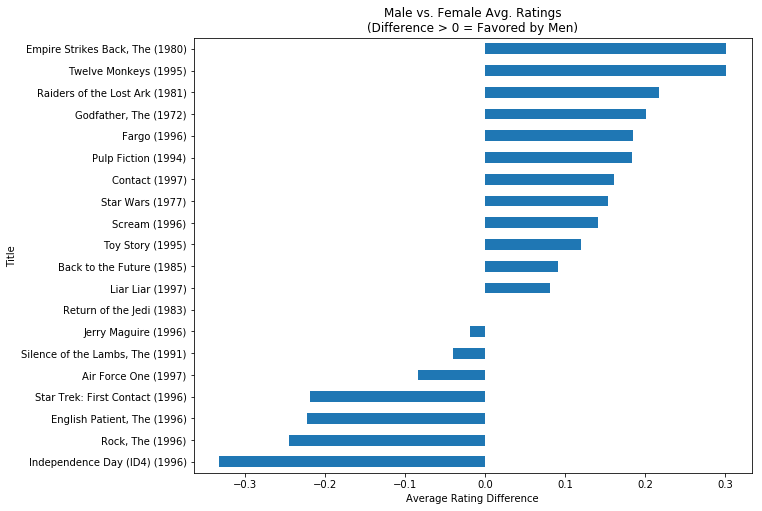

In [30]:
disagreements = menwomanratediff[menwomanratediff.movie_id.isin(Best20.index)]['diff']
disagreements.sort_values().plot(kind='barh', figsize=[10, 8])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');

In [33]:
# Clearing memory erasing opened data frames  from memory
del (menwomanratediff)
del (Best20)
del (disagreements)

The following visualization was gotten by using the SAS platform. In my opinion, this is a better visualization under a mnemonic consideration.  You can try to get this visualization done by using Python. If you want to do so it is my guess you will have hard work to do in advance.

You can click over the plot to get an html version.

[![title](img/movies_rating.png)](http://www.arqmain.net/MLearning/PythonProjects/Pandas/Project3/Movies_Rating_gif.html)



## VI CONCLUSION

Through the development of this work, it has been possible to verify that using a platform for datamanagement supported by Python Pandas can achieve very good results in data analysis.

In this project, the commands are translated to SQL in the background and when forced to execute, then the compiled SQL is executed on the database side and only the resulting dataset is loaded to the memory. This characteristic turns out to be extremely useful especially when the whole dataset does not fit the computer memory.

Equivalent results can be obtained using R instead of Python Pandas. In my opinion, many of the tables generated in this project can be enhanced and better manipulated using R.

In a next publication I will develop this same content but using R. Claro this, my priorities from now on are others so, surely, this will be effective as long as the time and my encouragement allow me.


<hr>
By: Hector Alvaro Rojas &nbsp;&nbsp;|&nbsp;&nbsp; Data Science, Visualizations and Applied Statistics &nbsp;&nbsp;|&nbsp;&nbsp; February 11, 2018<br>
    Url: [http://www.arqmain.net]   &nbsp;&nbsp;&nbsp;|&nbsp;&nbsp;&nbsp;   GitHub: [https://github.com/arqmain]
    <hr>